#### Objective: Over the past year Credit One has taken notice of an increase in the number of customers who have defaulted on loans. In this task we use the available customer loan information to build regression machine learning models to predict a payment amount a customer will make.  
#### This work includes: 1. data screening, processing, & cleaning, 2. Data Selection,  3. machine learning model training 4.  model evaluation & selction,  and 5. testing of the  selected model.

#### The available data was made available by Tamkang University, Taiwan. This data  includes 30000 records containing customer loan information.  The information includes: Credit Limit provided to customer, Gender, Education, Marital status, Age, 6 month payment history, 6 month bill statement amounts, 6 month amount of payment made and Default status.

In [1]:
#import modules needed for the regression task
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
# import the data
rawData =pd.read_csv('creditD.csv', header = 0)

In [3]:
#examine the structure of the data to ensure it was imported ing the right format
rawData.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person,default,GENDER,Mstatus,EdLevel
0,0,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,young,yes,female,married,university
1,1,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,young,yes,female,single,university
2,2,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,female,no,female,single,university
3,3,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,female,no,female,married,university
4,4,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,male,no,Male,married,university


In [4]:
# remove unnamed column
rawData= rawData.drop(['Unnamed: 0'], axis = 1)

In [5]:
#confirm removal of the unwanted column
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person,default,GENDER,Mstatus,EdLevel
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,young,yes,female,married,university
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,young,yes,female,single,university
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,female,no,female,single,university
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,female,no,female,married,university
4,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,male,no,Male,married,university


## Data Selection

In [6]:
#select features using iloc
features=rawData.iloc[:,11:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
# select the dependent variable using pandas
depVar = rawData['PAY_AMT6']

In [8]:
# Establish the training set for the x-variables in this case only the first 1000 rows
X_train=(features[:1000])
X_train_count = len(X_train.index)
print ('Then number of observations in the X training set are:', str (X_train_count))
X_train.head()

Then number of observations in the X training set are: 1000


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [9]:
# Establish the training set for the Y-variable or dependent variable(the number of row must match)
# the X_train set.
Y_train = (depVar[:1000])
Y_train_count = len(Y_train.index)
print('The number of obsevation in the Y training set are:', str(Y_train_count))
Y_train.head()

The number of obsevation in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [10]:
# Establish the testing set for the X variables. (that is the portion of the features that will 
# be used for testing the model).
# Testing set (X Testing)
X_test=features[-100:]
X_test_count = len (X_test.index)
print('The number of observations in the feature testing set is:', str(X_test_count))
print (X_test.head())


The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
29900         0         0         0         0         0         0  
29901         0      6556      3250      1563      1208       781  
29902    168096      6409      7335      4448      4519      5003  
29903     10018     13333        99        99    172104     30013  
29904      2600      4553      5800      2000      1000      1462  


In [11]:
# establish the ground truth.(that is establsih the portion of the feature which will be used to 
# test for Y the dependent variable).
#Ground Truth
Y_test=depVar[-100:]
Y_test_count=len (Y_test.index)
print('The number of observation in the y training (dependent variable)set are:', str(Y_test_count))
Y_test.head()

The number of observation in the y training (dependent variable)set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [12]:
# Use cross validation to evaluate the machine learning model's skill on unseen data.
# must import : from sklearn.cross_validation import train_test_split

# Since our training and testing sets are already established implement cross validation.
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train)

# use the shape function to confirm the split was made as needed:
X_train.shape, X_test.shape


((750, 12), (250, 12))

## Model Building and Evaluation

In [13]:
# Establish the variables (names) that will represent each model.
modelSVR = SVR(gamma = 'scale')
modelRF  = RandomForestRegressor(n_estimators = 100)
modelLR  = LinearRegression()

In [14]:
# establish or confirm the variable for our features. I created a the "feature" variable earlier
# using iloc.

print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [15]:
# confirm the dependent variable
depVar.head()

0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

## Random Forest Regression Model Fitting and Scoring

### Note: use the cross validation score to evaluate the models; the model with the highest score should be used for making predictions. first confirm that the right library has been imported from sklearn.model_selection import cross_val_score. This was done in the first cell of the notebook.
#### The values correspond to the following: 1st value - The score array for test scores on each cv split. (Higher is an indicator of better performing model). 2nd value - The time for fitting the estimator on the train set for each cv split. 3rd value - The time for scoring the estimator on the test set for each cv split.

In [16]:
## Model fitting
# 1. pass the training data thru the model and  "fit" fuction to allow for training and model building
# 2. use cross validation score to evaluate the model
# 3. score the trained model
modelRF.fit(X_train,Y_train)
print('modelRF cross validation scores')
print (cross_val_score(modelRF, X_train, Y_train, cv =5))
print('modelRF trained model score')
modelRF.score(X_train, Y_train)


modelRF cross validation scores
[0.43679052 0.98526016 0.76323192 0.90993452 0.99816963]
modelRF trained model score


0.9448646018690563

## Support Vector Regression Model fitting and Scoring

In [17]:
modelSVR.fit(X_train, Y_train)
print('modelSVR cross validation scores')
print(cross_val_score(modelSVR, X_train, Y_train, cv = 5))
print('modelSVR trained model score')
modelSVR.score(X_train, Y_train)

modelSVR cross validation scores
[-0.02217373 -0.05121133 -0.02996082 -0.09736831 -0.0979951 ]
modelSVR trained model score


-0.02588842147975035

## Linear Regression Model Fitting and Scoring

In [18]:
modelLR.fit(X_train, Y_train)
print('modelLR cross validation scores')
print(cross_val_score(modelLR, X_train, Y_train, cv=5))
print('modelLR trained model score')
modelLR.score(X_train, Y_train)

modelLR cross validation scores
[1. 1. 1. 1. 1.]
modelLR trained model score


1.0

## Making Predictions and Evaluating the Results

### Random Forest Regression Model has been selected to make our predictions

#### The sklearn.metrics object is the main object that contains most of the metric fuctions needed. confirm that: from sklearn.metrics import mean_squared_error & from sklearn metrics import r2_score are imported into the notebook.

#### Addtionally, since this is a regression problem RMSE and R^2 will be used to measure the trained model. Since RMSE is the square root of mean_squared error.  confirm that :from math import sqrt.

In [19]:
# make predictions and metrics
predictionsRF = modelRF.predict(X_test)

# deterimine R^2 for the ground truth vs predictions
predRsquaredRF = r2_score(Y_test, predictionsRF)

# calculte rmse of ground truth vs predictions
rmseRF = sqrt (mean_squared_error (Y_test,predictionsRF))

print('R Squared modelRF: %.3f' % predRsquaredRF)
print('RMSE modelRF: %.3f' % rmseRF)

R Squared modelRF: 0.785
RMSE modelRF: 12128.962


### Plotting the prediction results for modelRF:
#### Unless the model will be deployed the final step in producing a machine learning model is a plot to comare between the predictions and the known values(ground truth, Y_test)

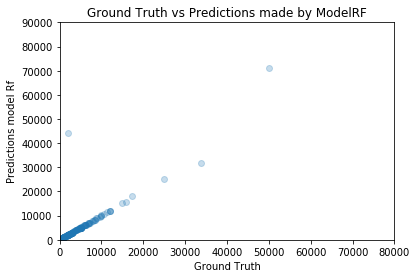

In [20]:
plt.scatter(Y_test,predictionsRF, alpha = 0.25)
plt.title ('Ground Truth vs Predictions made by ModelRF')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions model Rf')
plt.xlim(0,80000)
plt.ylim(0,90000)
plt.show()